# Observations and Insights

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,
                        how = 'outer', on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
print(f"There are {number_of_mice} mice")

There are 249 mice


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouseid_df = combined_data['Mouse ID'].value_counts()
mouseid_df.head()

g989    13
p136    10
i334    10
x581    10
a411    10
Name: Mouse ID, dtype: int64

In [66]:
duplicate_mouseid_df = combined_data.set_index('Mouse ID')
mouseg989 = duplicate_mouseid_df.loc['g989', :]
mouseg989.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [67]:
# Delete the data for g989
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = duplicate_mouseid_df.drop(index = 'g989')
clean_mice_df = clean_mice_data.reset_index()
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(clean_mice_df["Mouse ID"].value_counts())
print(f"There are {number_of_mice_clean} mice")

There are 248 mice


# Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumorvolume = clean_mice_df ['Tumor Volume (mm3)']

#Mean
mean = np.mean(tumorvolume)
print (f"The mean tumor volume is {mean}")

#Median
median = np.median(tumorvolume)
print (f"The median tumor volume is {median}")

#Variance
variance = np.var(tumorvolume, ddof =0)
print (f"The variance of the tumor volume is {variance}")

#Standard Deviation
standard_dev = np.std(tumorvolume, ddof =0)
print (f"The standard deviation of the tumor volume is {standard_dev}")

#SEM
sem = clean_mice_df["Tumor Volume (mm3)"].sem()
print(f"The SEM value is {sem}")


The mean tumor volume is 50.435293232255326
The median tumor volume is 48.933453655
The variance of the tumor volume is 79.42063964177214
The standard deviation of the tumor volume is 8.911825830982792
The SEM value is 0.2055906218698623


In [70]:
# Place all of the data found into a summary DataFrame
summary_df = pd.DataFrame({"Mean": [mean],
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": standard_dev,
                              "SEM" : sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.42064,8.911826,0.205591


# Bar and Pie Charts

In [75]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study\
regimen_grouped_df = pd.DataFrame(combined_data.groupby(["Drug Regimen"]).count()).reset_index()

# Only use the Drug Regimen and Mouse ID columns
barchart_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]

#Change the key label and use the Drug Regimen as the index for the labels
barchart_datapoints = barchart_datapoints.rename(columns={"Mouse ID": "Number of Mice"})
barchart_datapoints = barchart_datapoints.set_index("Drug Regimen")

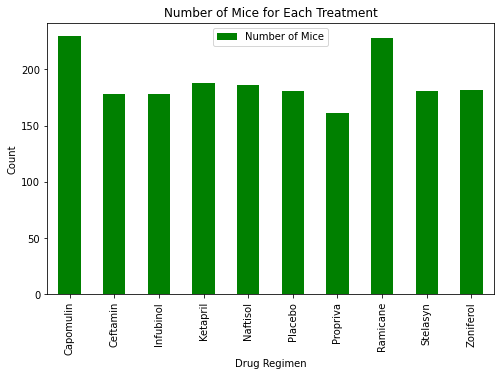

In [76]:
#Plot bar chart and add a title
barchart_datapoints.plot(kind="bar", figsize=(8,5), color = 'g')
plt.title("Number of Mice for Each Treatment")
plt.ylabel("Count")
plt.show()

In [100]:
# Generate a pie plot showing the distribution of female versus male mice 
#Count number of females and males
gender_df = pd.DataFrame(combined_data.groupby(["Sex"]).count()).reset_index()

# Only use "Sex" and "Mouse ID" columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


In [101]:
# Labels for the sections of the pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = "Count"

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightgreen"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0)

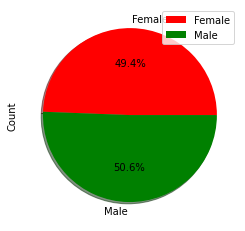

In [108]:
gender_df.groupby(['Sex']).sum().plot(kind='pie', y='Count', shadow = True, colors = 'r''g',autopct='%1.1f%%')

# Quartiles, Outliers and Boxplots


In [1]:

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [2]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [3]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# Line and Scatter Plots

In [4]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [5]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


# Correlation and Regression

In [6]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen